In [69]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


Map for the three most rare crime categories in San Francisco

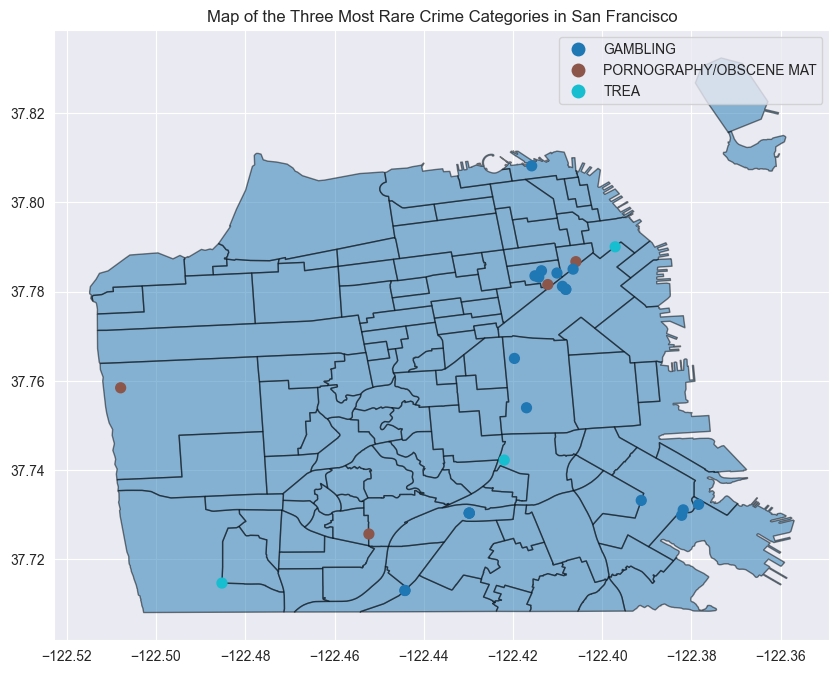

In [70]:
geojson_file = './SF_Find_Neighborhoods.geojson'
geojson_gdf = gpd.read_file(geojson_file)
crime_df = pd.read_csv('./Police_Department_Incidents_-_Previous_Year__2016_.csv')
gdf = gpd.GeoDataFrame(crime_df, geometry=gpd.points_from_xy(crime_df['X'], crime_df['Y']))

category_counts = gdf['Category'].value_counts()
rare_categories = category_counts.tail(3).index.tolist()

filtered_gdf = gdf[gdf['Category'].isin(rare_categories)]
fig, ax = plt.subplots(figsize=(10, 10))
geojson_gdf.plot(ax=ax, alpha=0.5, edgecolor='black')
filtered_gdf.plot(ax=ax, column='Category', legend=True, markersize=50)

ax.set_title('Map of the Three Most Rare Crime Categories in San Francisco')

plt.show()

Map for the events that happened on the day when the most crimes were recorded in the city.

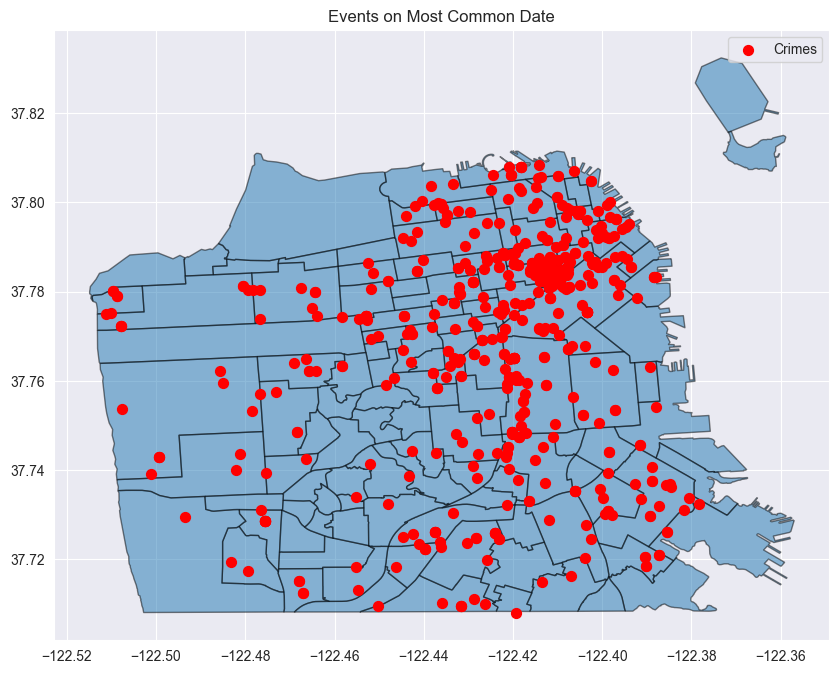

The day with the most crimes recorded in the city is: 01/01/2016 12:00:00 AM


In [71]:
df = pd.read_csv('./Police_Department_Incidents_-_Previous_Year__2016_.csv')
geometry = gpd.points_from_xy(df['X'], df['Y'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)
crime_counts = gdf['Date'].value_counts()
most_common_date = crime_counts.idxmax()
most_common_date_events = gdf[gdf['Date'] == most_common_date]

geojson_file = './SF_Find_Neighborhoods.geojson'
sf_map = gpd.read_file(geojson_file)
ax = sf_map.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
most_common_date_events.plot(ax=ax, markersize=50, color='red', label='Crimes')

# Add legend and title
ax.legend()
ax.set_title('Events on Most Common Date')

# Show the map
plt.show()
print(f"The day with the most crimes recorded in the city is: {most_common_date}")


Day and hour when the most incidents occur.

/var/folders/64/7mt0grr15rb172vkdr1cvbfw0000gn/T/ipykernel_69500/2726874403.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


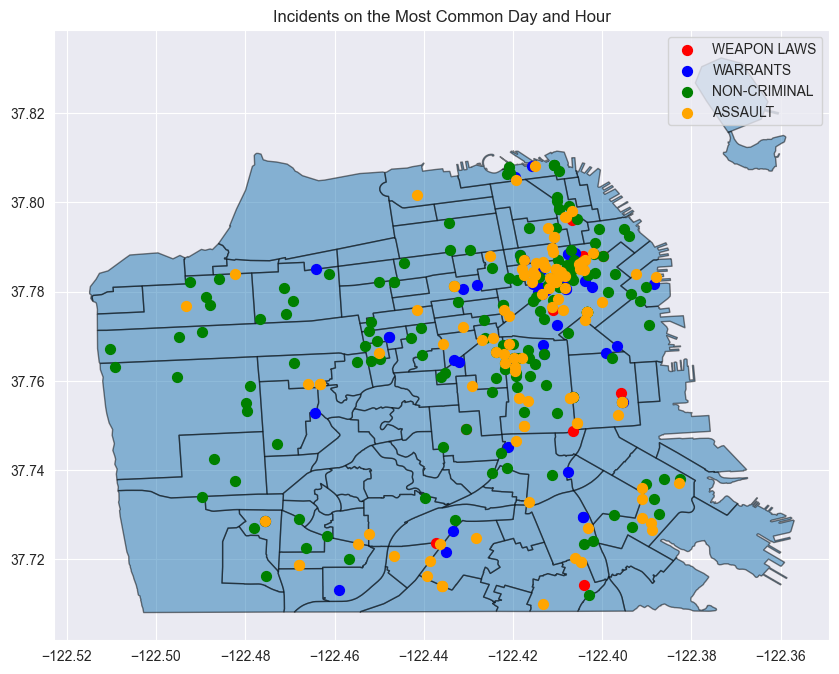

In [72]:
geojson_file = './SF_Find_Neighborhoods.geojson'
df = pd.read_csv('./Police_Department_Incidents_-_Previous_Year__2016_.csv')

df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day_name()
df['Hour'] = df['Time'].str.extract(r'(\d+):')

incident_counts = df.groupby(['Day', 'Hour']).size().reset_index(name='Count')
max_incident = incident_counts.loc[incident_counts['Count'].idxmax()]
max_incident_day = max_incident['Day']
max_incident_hour = max_incident['Hour']
max_incident_df = df[(df['Day'] == max_incident_day) & (df['Hour'] == max_incident_hour)]

sf_map = gpd.read_file(geojson_file)

incidents_gdf = gpd.GeoDataFrame(max_incident_df, geometry=gpd.points_from_xy(max_incident_df['X'], max_incident_df['Y']))
categorized_map = sf_map.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

incident_colors = {'WEAPON LAWS': 'red', 'WARRANTS': 'blue', 'NON-CRIMINAL': 'green', 'ASSAULT': 'orange'}
for category, color in incident_colors.items():
    category_incidents = incidents_gdf[incidents_gdf['Category'] == category]
    category_incidents.plot(ax=categorized_map, markersize=50, color=color, label=category)

categorized_map.legend()
categorized_map.set_title('Incidents on the Most Common Day and Hour')

plt.show()

A horopleth map with generalized statistics for the city's police districts.

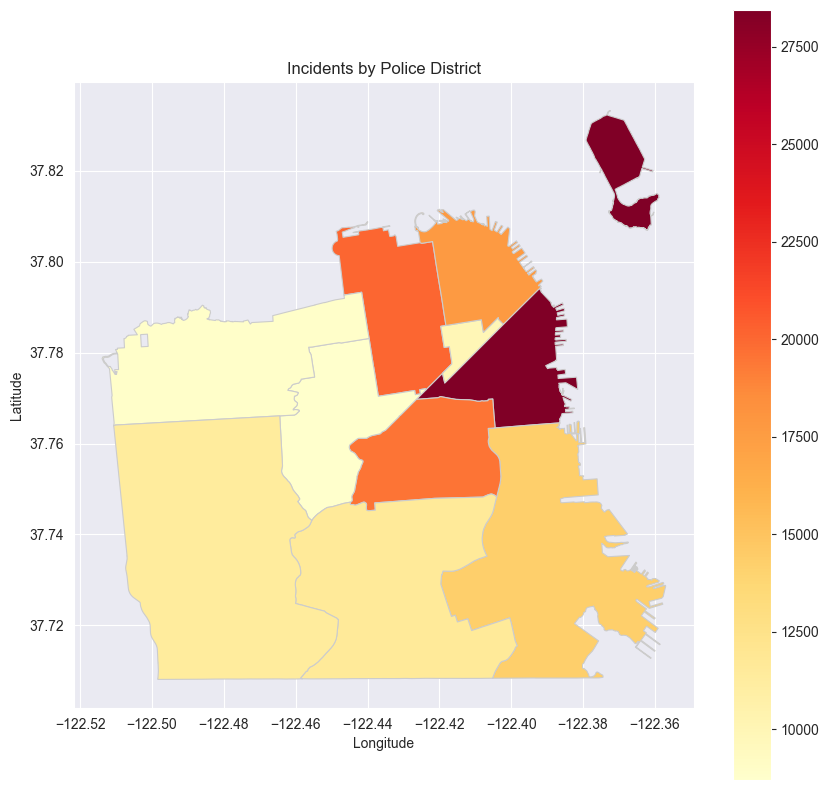

In [73]:
shapefile_path = "Current Police Districts-1"
districts = gpd.read_file(shapefile_path)

data = pd.read_csv('./Police_Department_Incidents_-_Previous_Year__2016_.csv')
district_counts = data['PdDistrict'].value_counts().reset_index()
district_counts.columns = ['PdDistrict', 'Count']

merged_data = pd.merge(districts, district_counts, left_on='district', right_on='PdDistrict', how='left')

fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='Count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Incidents by Police District')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()